## BAG OF VISUAL WORDS

In [ ]:
from PIL import Image
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Reading the files

In [2]:
folder1 = "C:/Users/shiva/OneDrive/Desktop/Github/DS201 DHV/Assignment-4/class_1_images-20241111"
folder2 = "C:/Users/shiva/OneDrive/Desktop/Github/DS201 DHV/Assignment-4/class_2_images-20241111"

# Extract patches

In [ ]:
def fix_srgb_profile(image_path):
    img = Image.open(image_path)
    img = img.convert("RGB")  
    return np.array(img)

def extract_patches(image):
    h, w, c = image.shape
    patches = []
    for i in range(0, h - 8 + 1, 8):
        for j in range(0, w - 8 + 1, 8):
            patch = image[i:i+8, j:j+8].flatten()
            patches.append(patch)
    return np.array(patches)

# Load images and extract patches

In [ ]:
def load_images(prefix, count):
    images = []
    for i in range(count):
        img_path = f"{prefix}_image_{i+1}.png"
        print(f"Loading {img_path}")
        img = fix_srgb_profile(img_path)
        images.append(img)
    return images

scene1_images = load_images("scene1", 5)
scene2_images = load_images("scene2", 5)

all_images = scene1_images + scene2_images
all_patches = np.vstack([extract_patches(img) for img in all_images])

# K-Means clustering to create 10 clusters (visual words)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(all_patches)

# Create BoVW histograms for each image

In [ ]:
def compute_histogram(image, kmeans):
    patches = extract_patches(image)
    labels = kmeans.predict(patches)
    hist, _ = np.histogram(labels, bins=np.arange(11))
    return hist

scene1_histograms = [compute_histogram(img, kmeans) for img in scene1_images]
scene2_histograms = [compute_histogram(img, kmeans) for img in scene2_images]

# Plot histograms

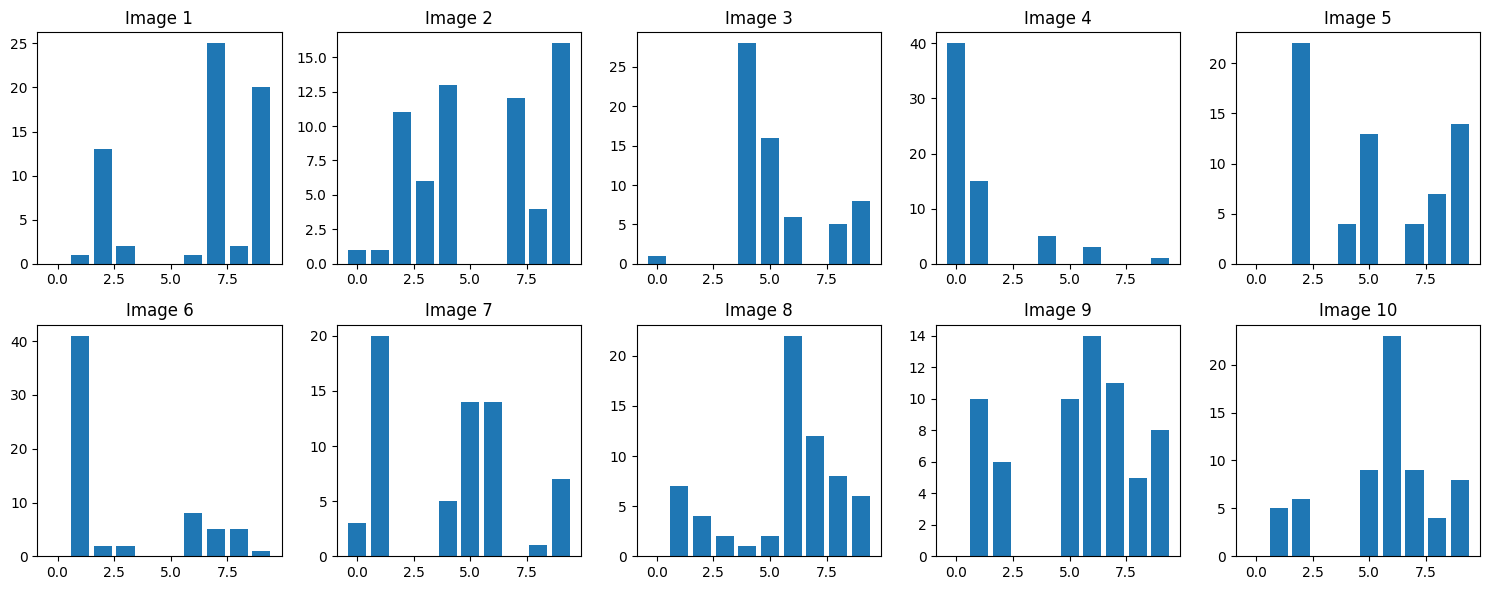

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, hist in enumerate(scene1_histograms):
    axes[0, i].bar(range(10), hist)
    axes[0, i].set_title(f"Scene 1 Image {i+1}")
for i, hist in enumerate(scene2_histograms):
    axes[1, i].bar(range(10), hist)
    axes[1, i].set_title(f"Scene 2 Image {i+1}")

plt.tight_layout()
plt.show()